## Relationship between Socio-Economic Factors (Education and Age) against Types of Products Purchased

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

In [7]:
df = pd.read_csv('Datasets/cleaned_customer.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,3,4,5,0,0,0,0,0,0,0
2212,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,2,5,7,0,0,0,1,0,0,0
2213,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,3,13,6,0,1,0,0,0,0,0
2214,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,5,10,3,0,0,0,0,0,0,0


In [8]:
joint_response = pd.DataFrame(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
joint_response

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2211,709,43,182,42,118,247
2212,406,0,30,0,0,8
2213,908,48,217,32,12,24
2214,428,30,214,80,30,61


Looking through the data, we find many of them suitable to be used as predictor variables for our study. In this portion, we will be using socio-economic factors and their associated parameters as predictors for the types of products - wines, fruits, meat, fish, sweets and gold - purchased from the business.

As such, the chosen predictor variables are:
1. Education
2. Birth year (Age)

Our hypothesis is that those of a greater age and education level have a greater preference for more 'luxurious goods' such as wine, meat and gold as these factors are more likely to influence their income and hence propensity to spend on more 'valuable' items.

In [9]:
joint_predictor = pd.DataFrame(df[['Education', 'Year_Birth']])
joint_predictor

,Education,Year_Birth
0,Graduation,1957
1,Graduation,1954
2,Graduation,1965
3,Graduation,1984
4,PhD,1981
...,...,...
2211,Graduation,1967
2212,PhD,1946
2213,Graduation,1981
2214,Master,1956


In [10]:
jointplot= pd.DataFrame(df[['Education', 'Year_Birth','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency', 'Dt_Customer']])
jointplot

,Education,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Dt_Customer
0,Graduation,1957,635,88,546,172,88,88,58,04-09-2012
1,Graduation,1954,11,1,6,2,1,6,38,08-03-2014
2,Graduation,1965,426,49,127,111,21,42,26,21-08-2013
3,Graduation,1984,11,4,20,10,3,5,26,10-02-2014
4,PhD,1981,173,43,118,46,27,15,94,19-01-2014
...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,1967,709,43,182,42,118,247,46,13-06-2013
2212,PhD,1946,406,0,30,0,0,8,56,10-06-2014
2213,Graduation,1981,908,48,217,32,12,24,91,25-01-2014
2214,Master,1956,428,30,214,80,30,61,8,24-01-2014


In [11]:
jointplot['Dt_Customer'] = pd.to_datetime(jointplot['Dt_Customer'], format='%d-%m-%Y')
jointplot['CurrentDate'] = datetime.datetime(2021, 1, 1)
jointplot['numMonths'] = (jointplot['CurrentDate'] - jointplot['Dt_Customer']) / np.timedelta64(1, 'D') / 30
jointplot['Recency'] = jointplot['Recency'] / 30


In [12]:
#average purchases over the months
for var in jointplot.columns[2:7]:
    jointplot[var] = jointplot[var]/ (jointplot["numMonths"] - jointplot["Recency"])

jointplot.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)
jointplot

,Education,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,1957,6.386188,0.885015,5.491116,1.729802,0.885015,88
1,Graduation,1954,0.134529,0.012230,0.073380,0.024460,0.012230,6
2,Graduation,1965,4.797297,0.551802,1.430180,1.250000,0.236486,42
3,Graduation,1984,0.132477,0.048173,0.240867,0.120434,0.036130,5
4,PhD,1981,2.122699,0.527607,1.447853,0.564417,0.331288,15
...,...,...,...,...,...,...,...,...
2211,Graduation,1967,7.840029,0.475488,2.012532,0.464431,1.304829,247
2212,PhD,1946,5.202905,0.000000,0.384451,0.000000,0.000000,8
2213,Graduation,1981,11.154791,0.589681,2.665848,0.393120,0.147420,24
2214,Master,1956,5.083135,0.356295,2.541568,0.950119,0.356295,61


# Bi-variate Analysis: Education and Age as Predictor Variables
We will first plot the box and whiskers plot, barchart, joint plot and heatmap for these factors.

<Axes: xlabel='Year_Birth', ylabel='Count'>

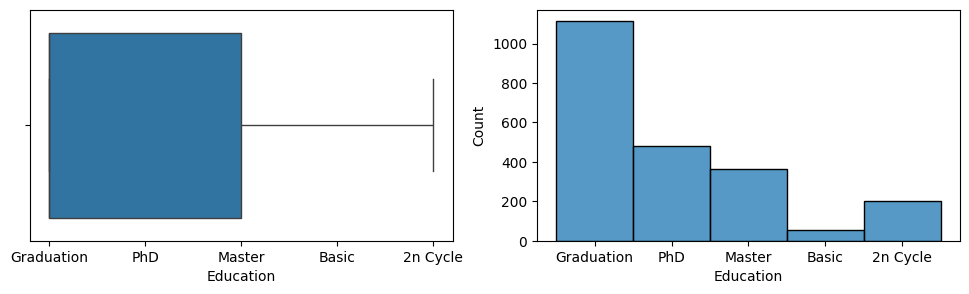

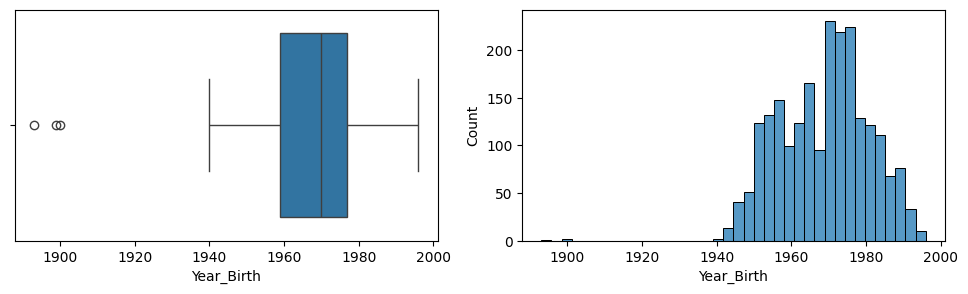

In [13]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))

sb.boxplot(data = joint_predictor['Education'], orient = "h", ax = axes[0])
sb.histplot(data = joint_predictor['Education'], ax = axes[1])

f, axes = plt.subplots(1, 2, figsize=(12, 3))

sb.boxplot(data = joint_predictor['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = joint_predictor['Year_Birth'], ax = axes[1])

Observing the 

In [14]:
jointplot_numeric=jointplot.copy()

In [15]:
education_mapping = {'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}
jointplot_numeric['education_encoded'] = jointplot_numeric['Education'].map(education_mapping)

jointplot_numeric.drop('Education', axis=1, inplace=True)

<Axes: xlabel='education_encoded', ylabel='Density'>

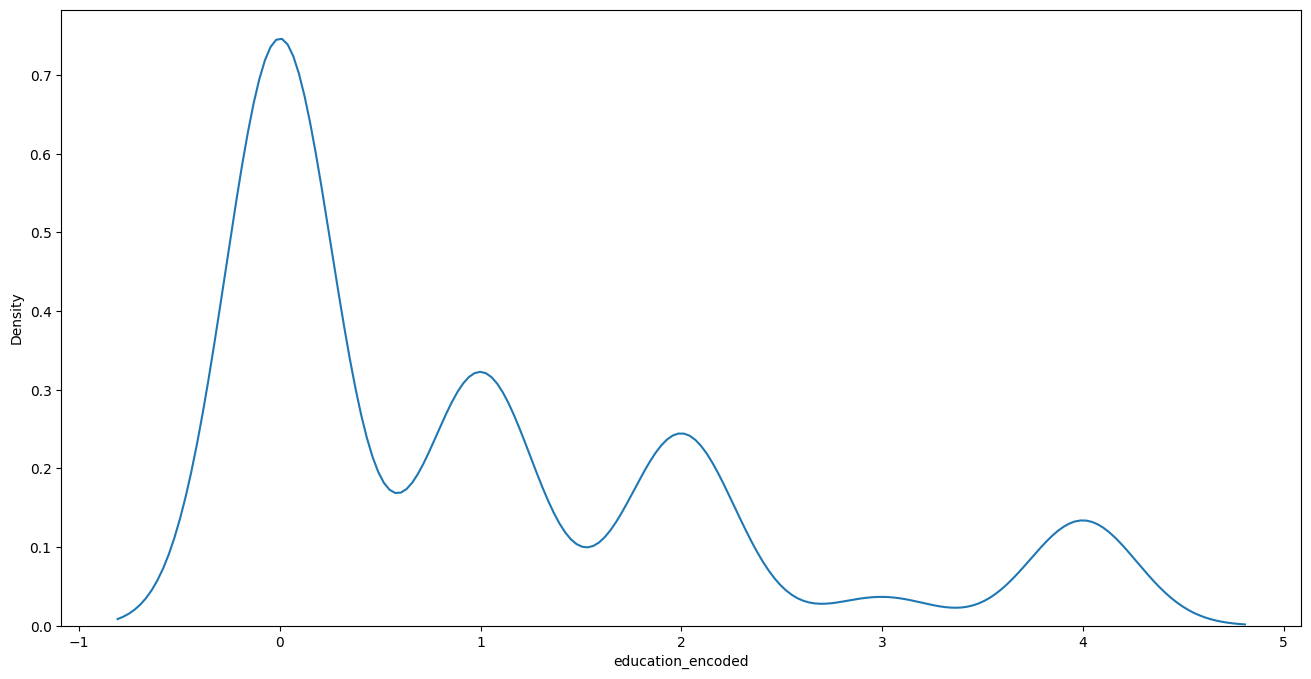

In [16]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = jointplot_numeric['education_encoded'])

In [17]:
skewness_education = jointplot_numeric['education_encoded'].skew()
print("Skewness of Education variable:", skewness_education)

Skewness of Education variable: 1.2041984747854662


The skewness value of ~1.20 indicates that the distribution is skewed to the right, towards the Education value 'Graduation', which could affect our clustering analysis later moving forward.

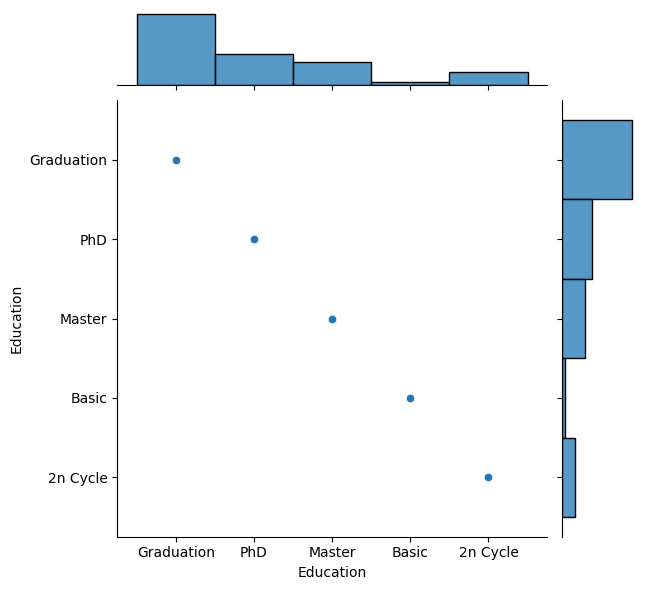

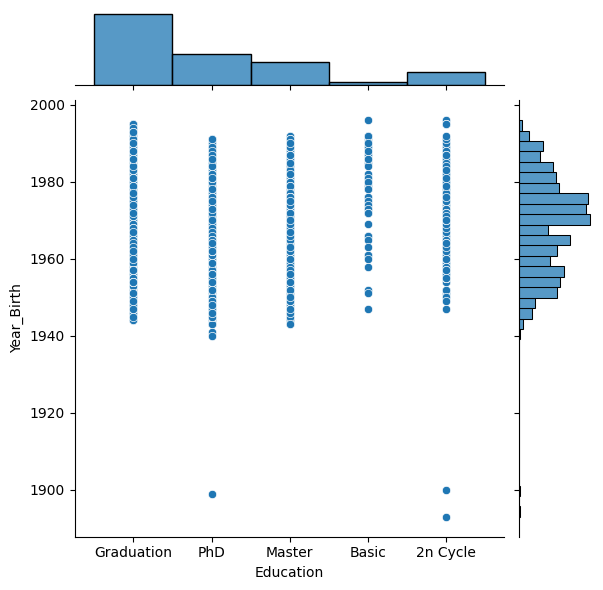

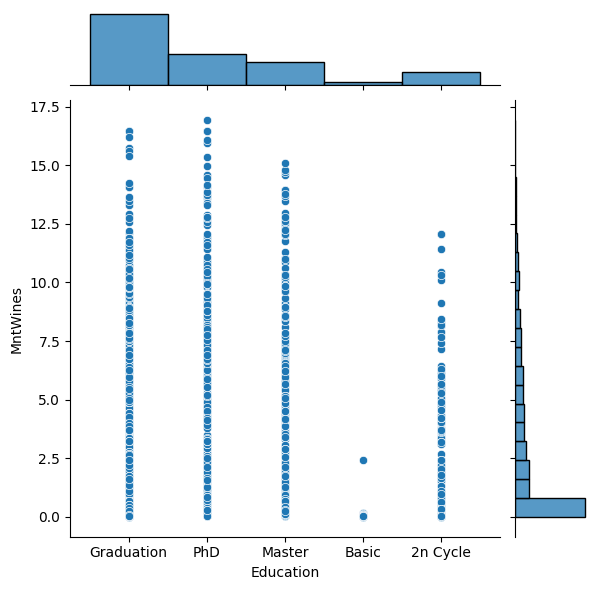

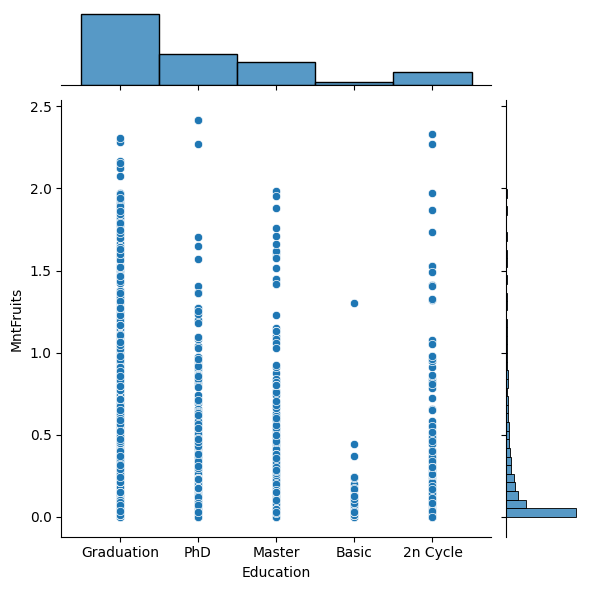

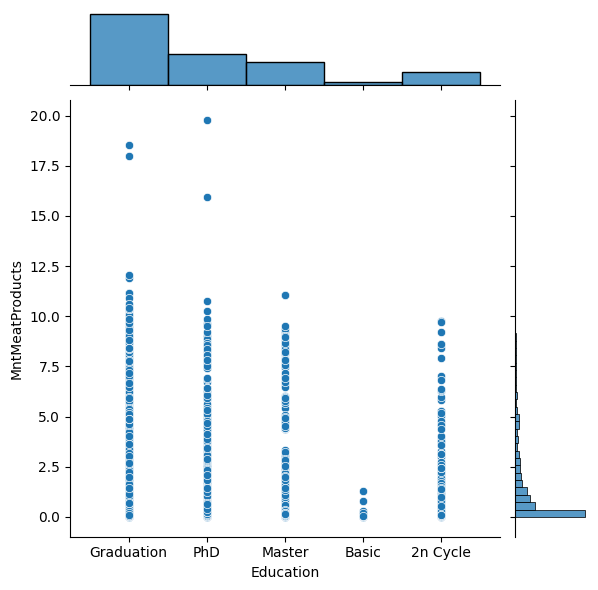

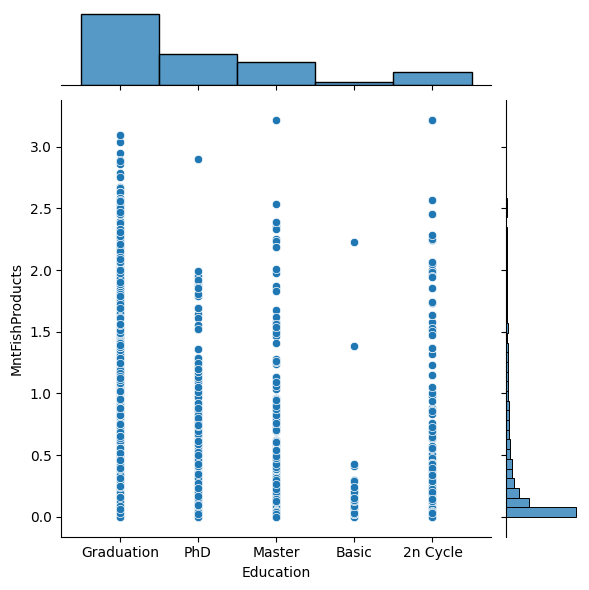

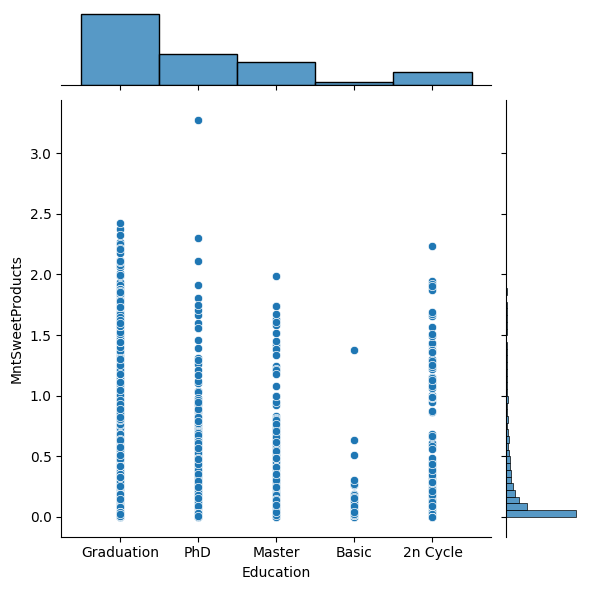

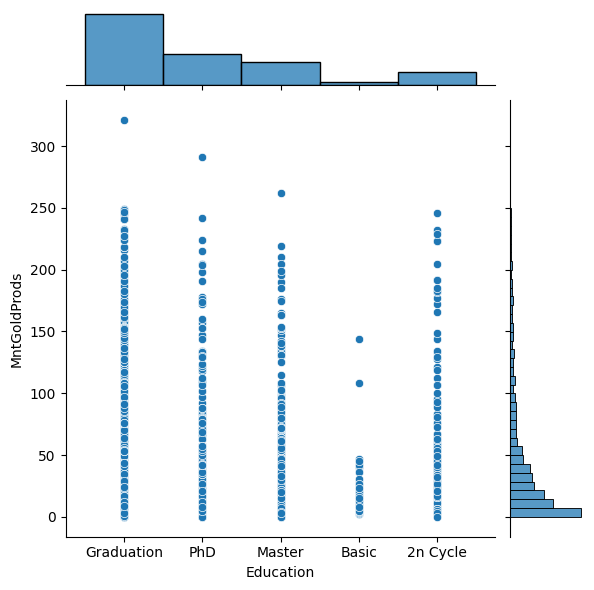

In [18]:
for var in jointplot:
    sb.jointplot(data = jointplot, x = "Education", y = var, height = 6)

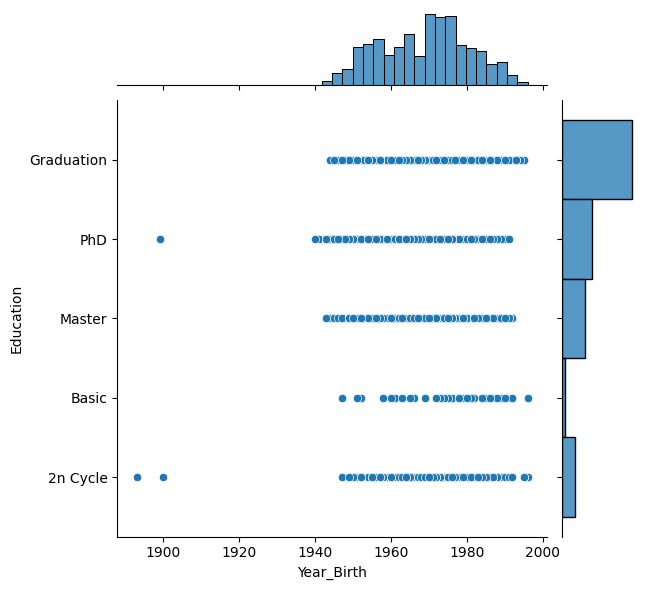

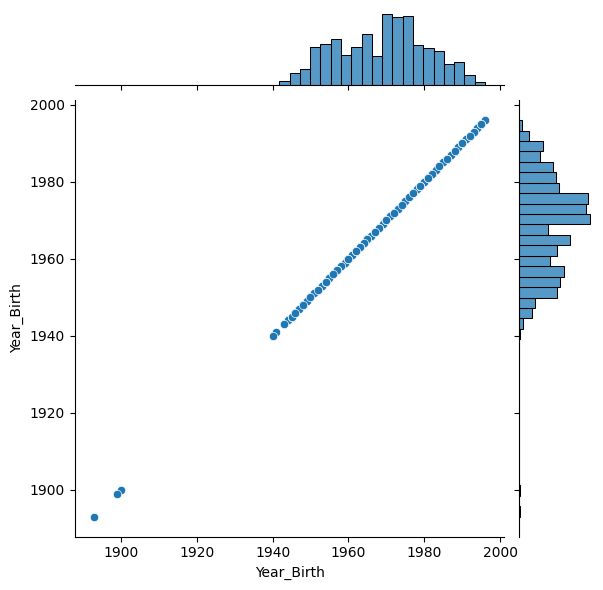

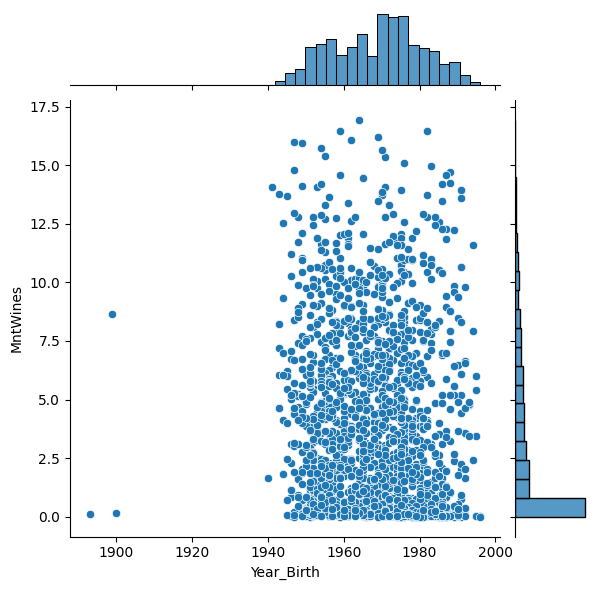

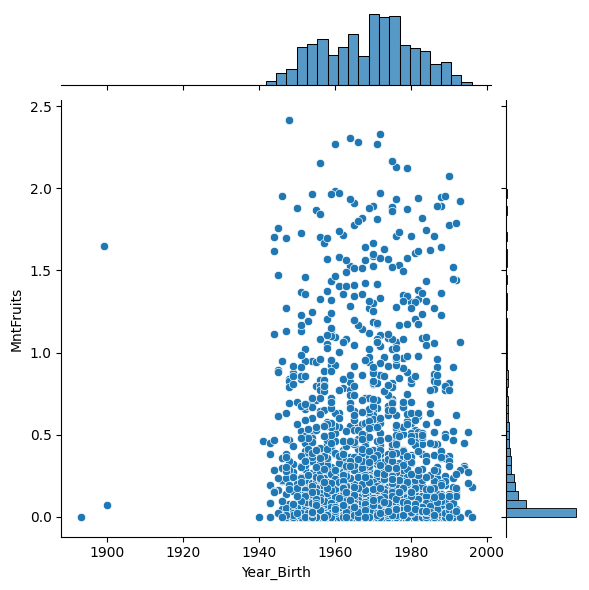

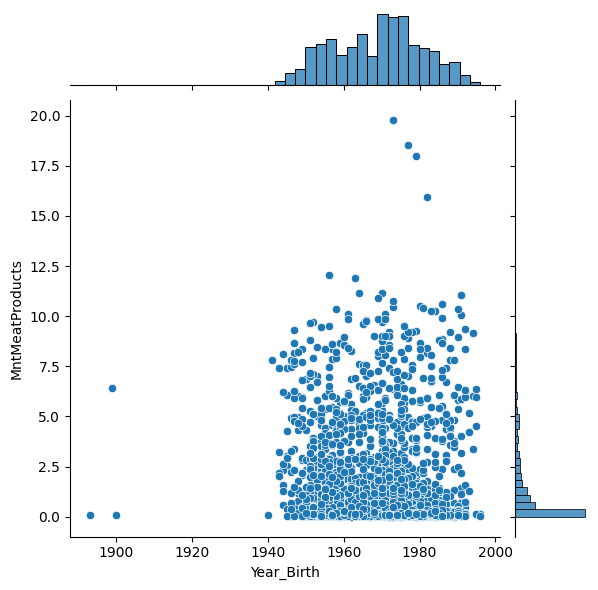

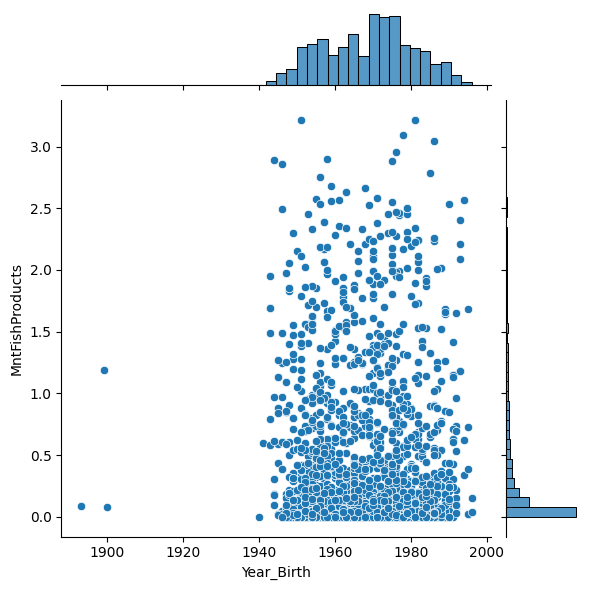

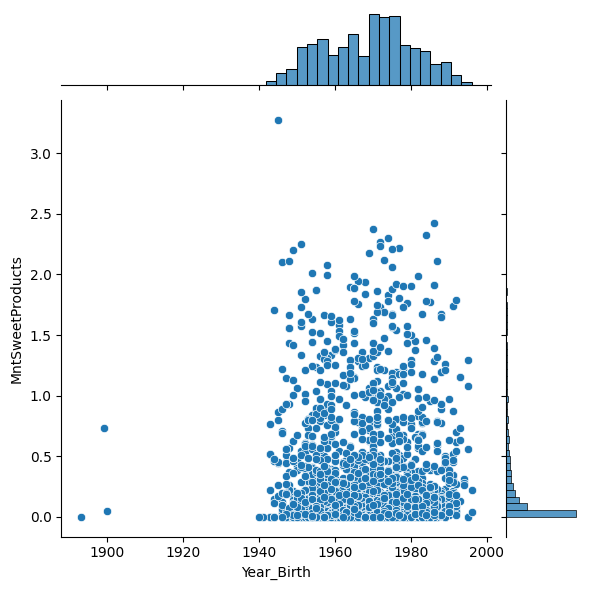

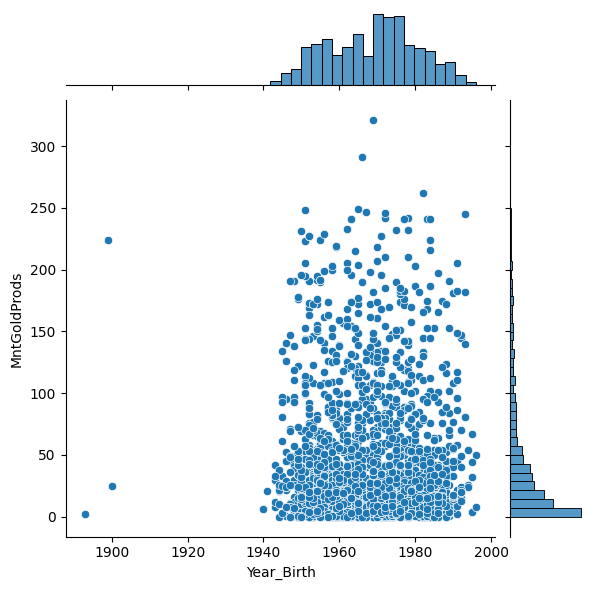

In [19]:
for var in jointplot:
    sb.jointplot(data = jointplot, x = "Year_Birth", y = var, height = 6)

As Education is a non-numeric factor, we need to encode it into numeric values using label encoding before a heatmap can be produced.

In [20]:
jointplot['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

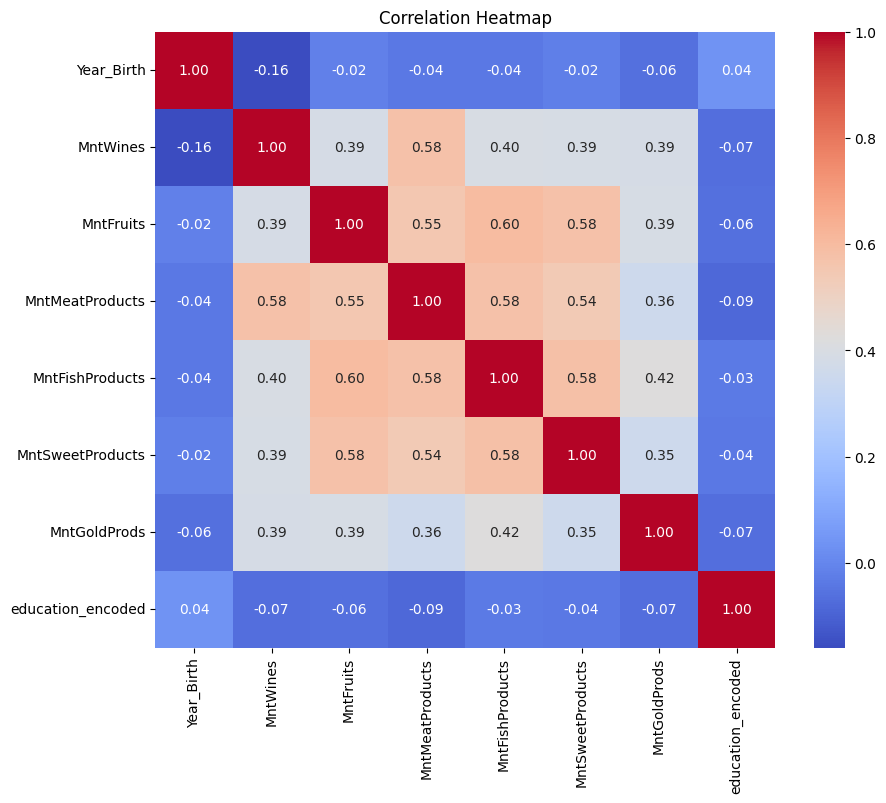

In [21]:
# Create a correlation matrix
corr_matrix = jointplot_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap correlation values of Education and Birth Year in relation to the types of products bought show a rather weak relationship between them.

# K_Means Clustering
We will first use the Elbow method to decide the number of clusters before using a 2D and 3D graph to visualise the clustering.

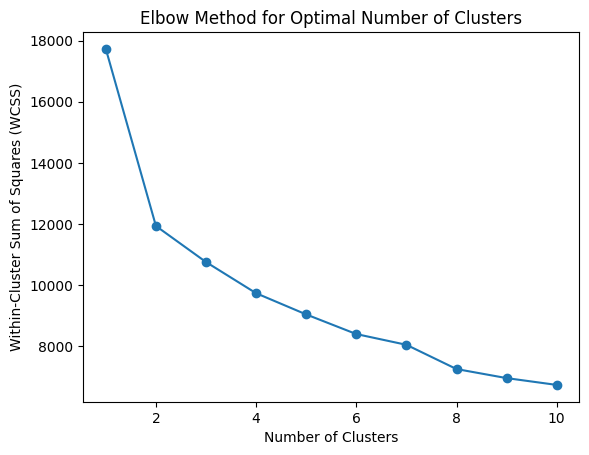

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(jointplot_numeric)

# Apply K-means clustering for a range of cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ attribute gives WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


After using the Elbow method, we realise that the point where adding more clusters does not significantly reduce the WCSS is where Number of Clusters = 2. Beyond this point, the rate of decrease in WCSS becomes less pronounced, suggesting diminishing returns from adding more clusters. Hence, we shall use 2 clusters for our 2D and 3D visualisation of clustering.

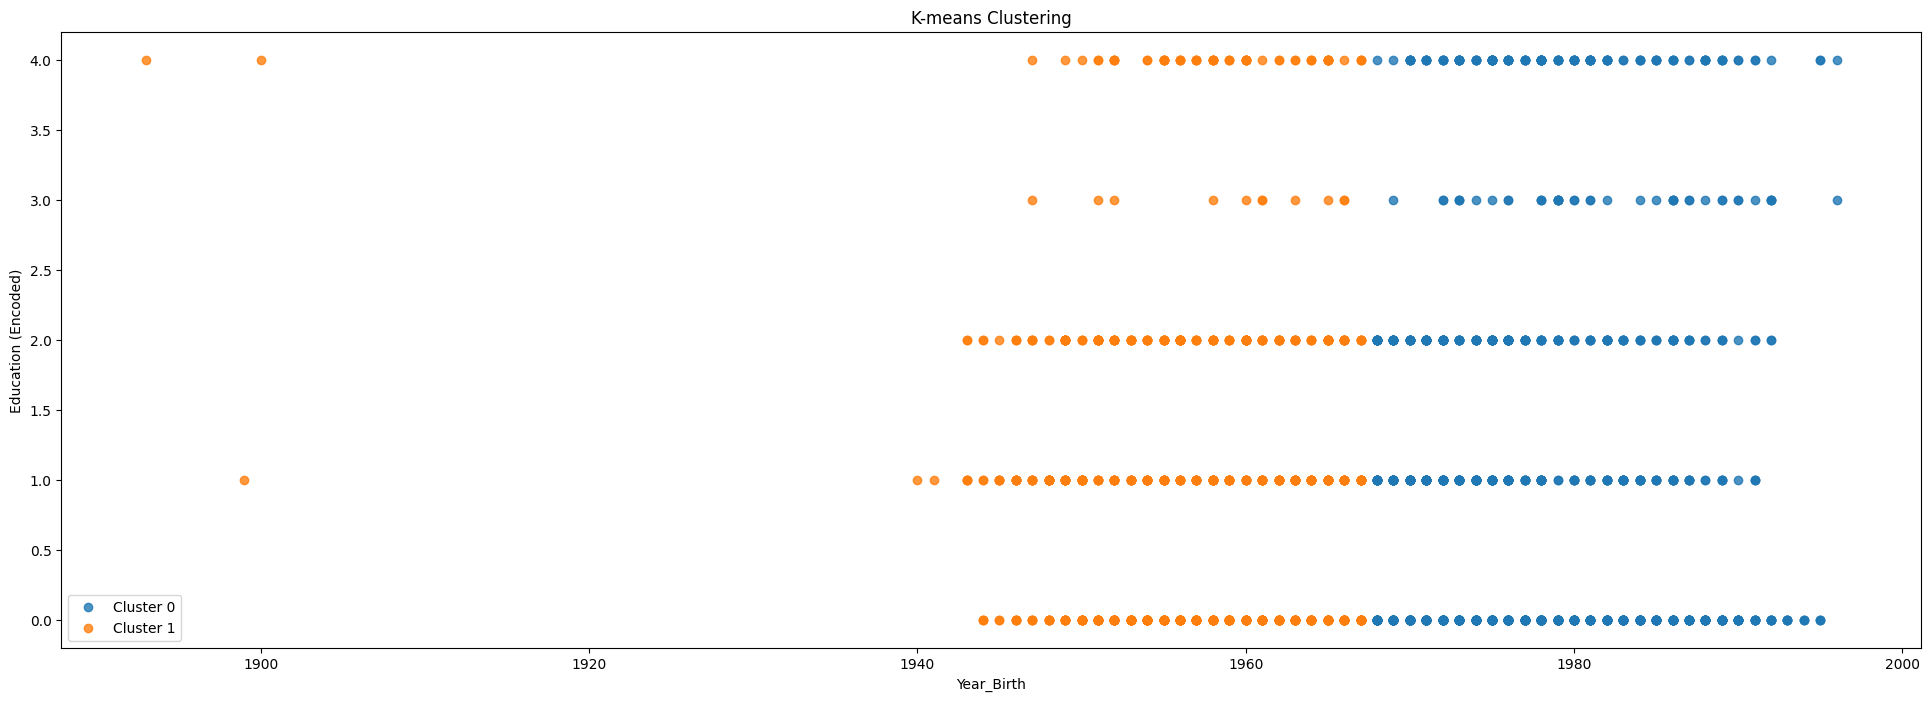

In [23]:
# Perform K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(jointplot_numeric[['Year_Birth', 'education_encoded']])

# Assign cluster labels to the DataFrame
jointplot_numeric['cluster'] = kmeans.labels_

# Plot the data with cluster labels
plt.figure(figsize=(24, 8))
for label in range(k):
    idx = jointplot_numeric['cluster'] == label
    plt.scatter(jointplot_numeric.loc[idx, 'Year_Birth'], jointplot_numeric.loc[idx, 'education_encoded'], label=f'Cluster {label}', alpha=0.8)
plt.xlabel('Year_Birth')
plt.ylabel('Education (Encoded)')
plt.title('K-means Clustering')
plt.legend() 
plt.show()

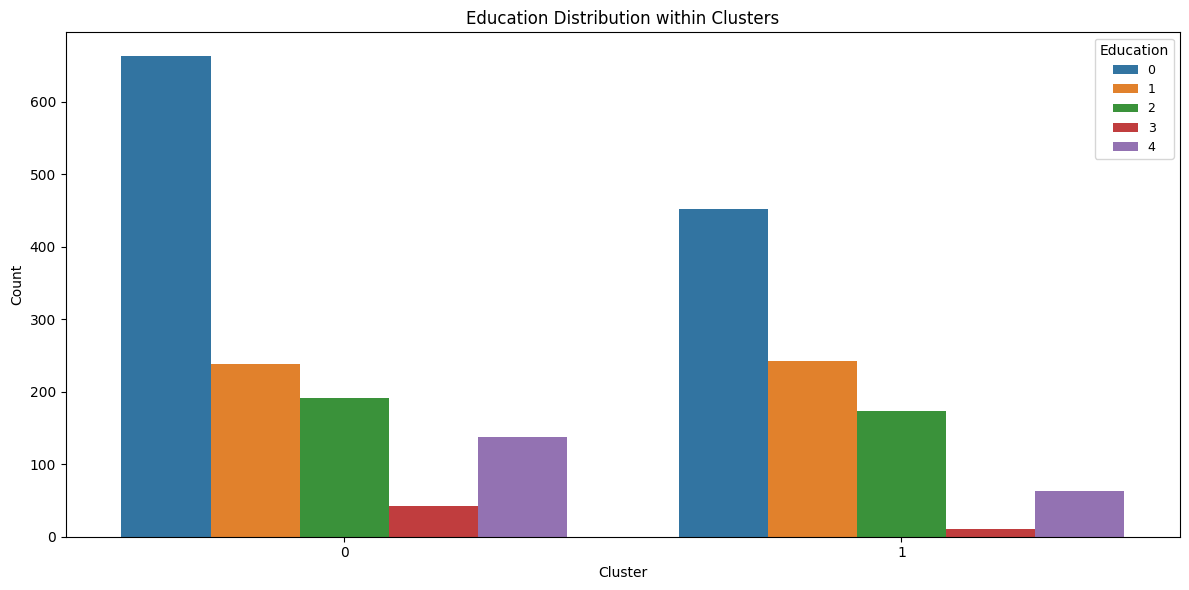

In [24]:
# Create subplots for Education
plt.figure(figsize=(12, 6))
sb.countplot(data=jointplot_numeric, x="cluster", hue="education_encoded", palette="tab10")
plt.title('Education Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education', fontsize=9)
plt.tight_layout()
plt.show()

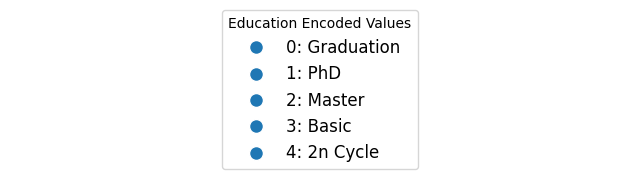

In [25]:
# Mapping between encoded values and education types
education_mapping = {'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}

# Create proxy artists for legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10, label=f'{encoded_value}: {education_type}') for education_type, encoded_value in education_mapping.items()]

# Create legend
plt.figure(figsize=(8, 1))
plt.axis('off')
plt.legend(handles=legend_handles, loc='center', fontsize='large', title='Education Encoded Values')
plt.show()

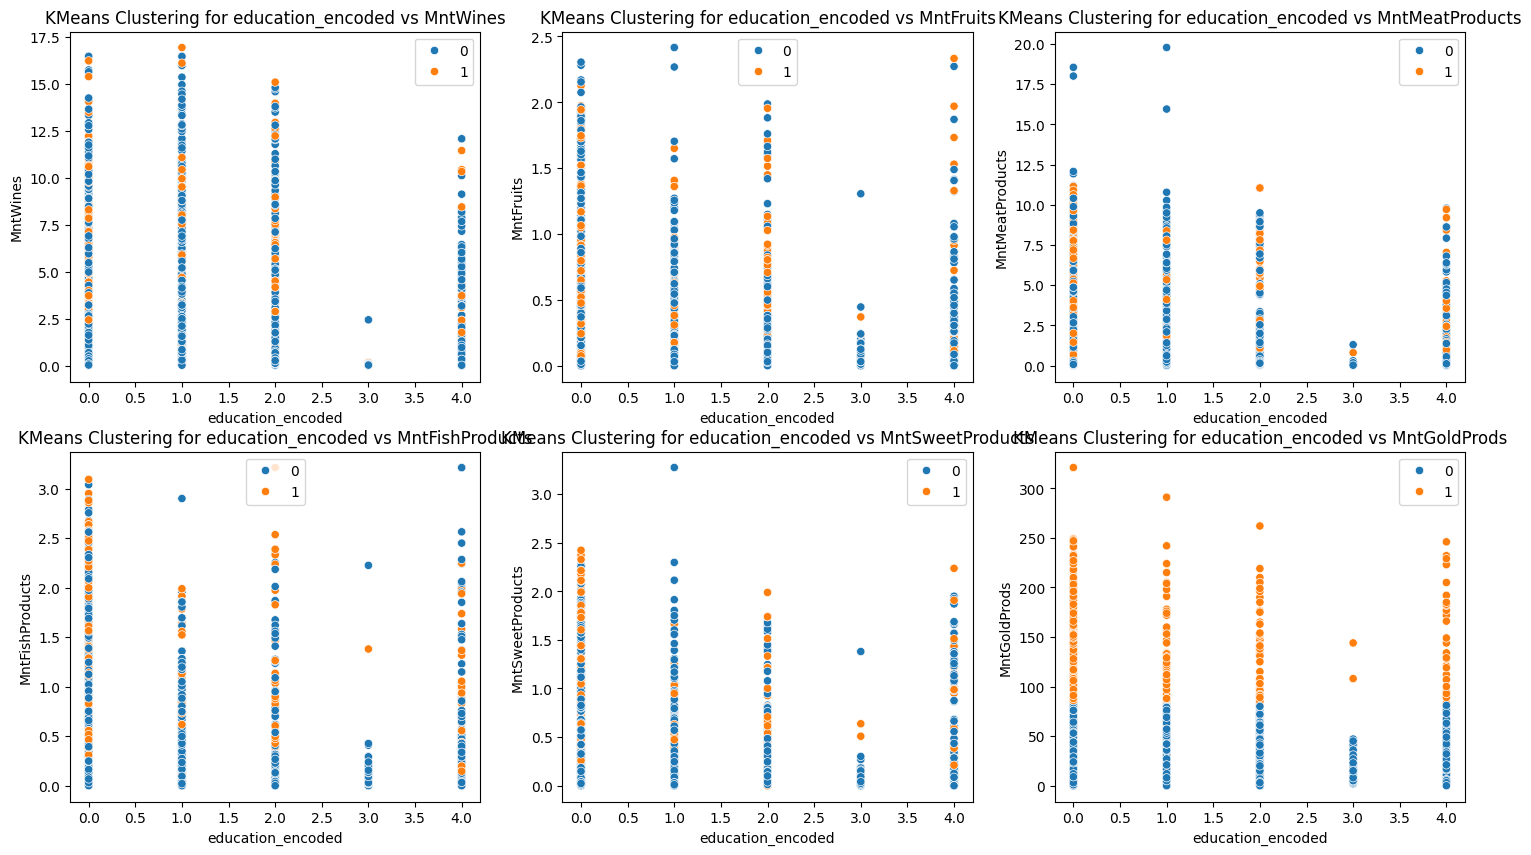

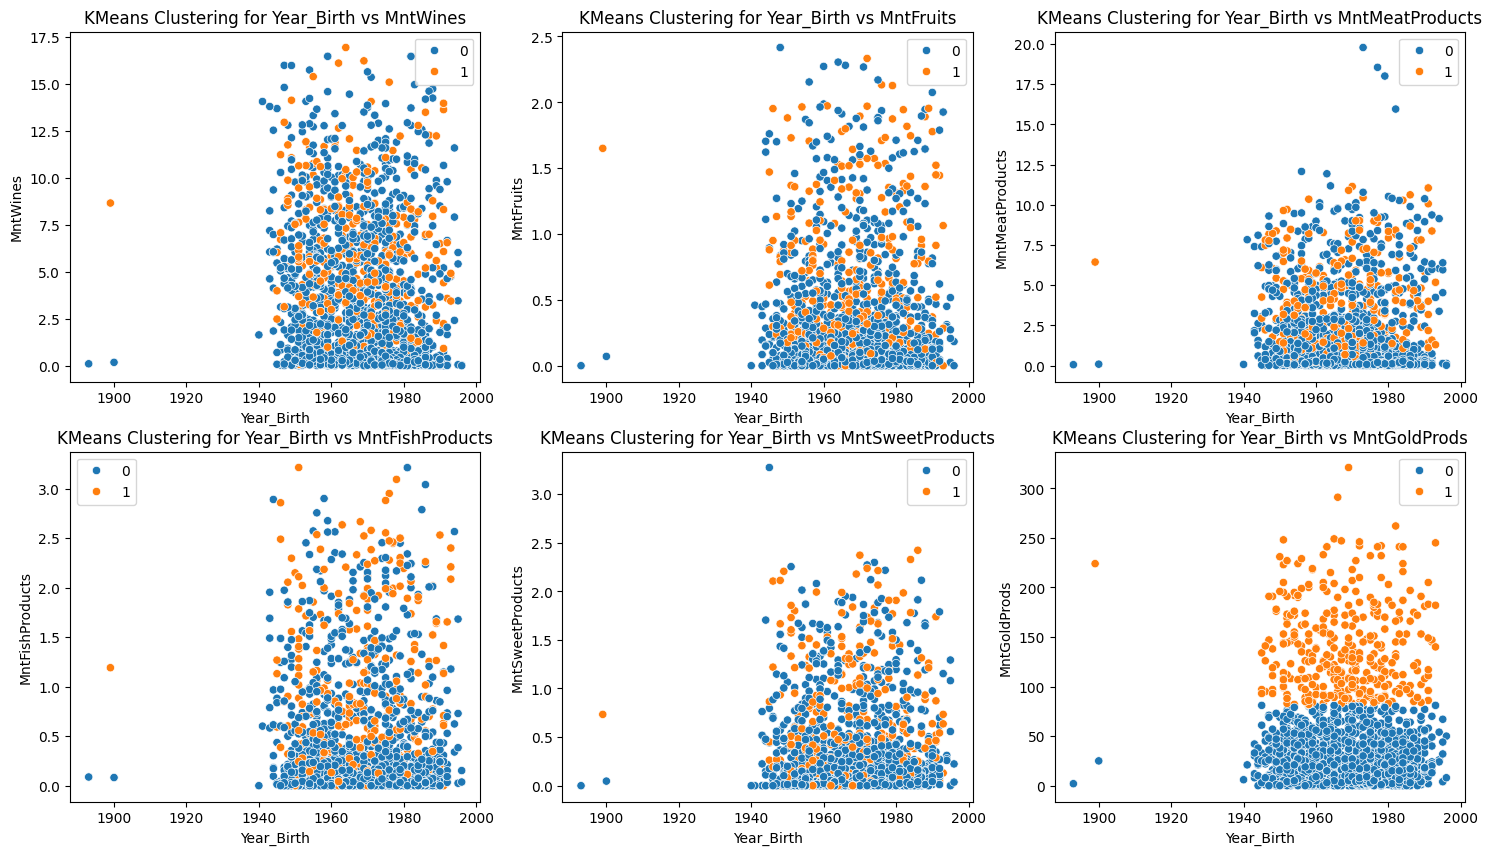

In [29]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

response_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for predictor_variable in ['education_encoded', 'Year_Birth']:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    kmeans.fit(jointplot_numeric[[predictor_variable] + response_variables])
    
    for i, response_variable in enumerate(response_variables):
        row = i // 3
        col = i % 3
        sb.scatterplot(data=jointplot_numeric, x=predictor_variable, y=response_variable, hue=kmeans.labels_, ax=axes[row, col])
        axes[row, col].set_title(f'KMeans Clustering for {predictor_variable} vs {response_variable}')
        axes[row, col].set_xlabel(predictor_variable)
        axes[row, col].set_ylabel(response_variable)

    plt.show()

In [26]:
# Compute total spending by cluster
spending_by_cluster = jointplot_numeric.groupby("cluster")[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum()

# List of commodities
commodities = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Compute average spending by commodity within each cluster
avg_spending_by_commodity = jointplot_numeric.groupby("cluster")[commodities].mean()

# Compute proportion of spending on each commodity within each cluster
proportion = avg_spending_by_commodity.T / spending_by_cluster["MntWines"]  # Assuming 'MntWines' is chosen as the reference commodity

# Apply background gradient to the proportions dataframe
proportion.style.background_gradient(cmap="viridis", axis=0).set_caption('Proportion of spending on commodities')


cluster,0,1
MntWines,0.000786,0.001060
MntFruits,0.000076,0.000082
MntMeatProducts,0.000473,0.000530
MntFishProducts,0.000107,0.000119
MntSweetProducts,0.000078,0.000084
MntGoldProds,0.011055,0.012670


The data is rather skewed as the top 2 and bottom 2 products are MntWines, MntGoldProds and MntSweets, MntFruits respectively, for both clusters. But based on the clustering data, we can conclude that:

| | Cluster 0 | Cluster 1 | 
| --- | --- | --- |
| Education level (majority) | Graduation (significantly greater) | Graduation and PhD (relatively significant) | 
| Education level (minority) | Basic (signicificantly lesser) | Basic and 2n cycle (relatively significantly lesser) | 
| Birth Year | 1940-late 1960s| 1970-1990s | 
| Highest Prop. Spending | MntWines and MntGoldProds (most significant) | MntWines (more significant) and MntGoldProds|
| Lowest Prop. Spending | MntSweets and MntFruits (both lower than next cluster) | MntSweets and MntFruits |  

But what is worth noting is that Cluster 0 has a higher proportion of spending on MntGoldProds but a lower proportion of spending on MntFishProducts as compared to Cluster 1.
